# USA Car Accident Analysis

## About Author
- Author :  Rahman Anwar
- Date : 15/01/2024
- Email : rahmananwar253@gmail.com
- Github : [rahmananwar253](https://github.com/rahmananwar253)
- Kaggle : [rahmananwar](https://www.kaggle.com/abdurrahmananwar)
- Linkedin: [rahmananwar](https://www.linkedin.com/in/rahman-anwar/)

## Objective
The primary objectives of this analysis are to:

**Visualize Geographic Data:** Leverage geospatial data to create intuitive and informative visualizations.
**Identify Accident Hotspots:** Locate and analyze regions with high frequencies of traffic accidents.

## Import Libraries
- First, you'll need some Python libraries like **pandas** for *data manipulation*, **matplotlib** and **seaborn** for *visualizations*, and **folium** for *hotspot mapping*.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

## Load and Explore the Data
- Load the dataset and get a quick overview to understand what you're working with.

In [2]:
# Load the data
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

# Display the first five rows
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
# Get a summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
df.shape

(7728394, 46)

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


## Data Cleaning and Preparation 

In [6]:
# Drop unnecessary columns
drop_columns=['ID','Source', 'Description', 'Start_Lat', 'Start_Lng', 'County', 'Zipcode', 'Timezone', 'Airport_Code',
                   'Wind_Direction', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df=df.drop(columns=drop_columns)

In [7]:
df.shape

(7728394, 33)

In [8]:
# to check missing values
df.isnull().sum().sort_values(ascending=False)

End_Lng              3402762
End_Lat              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Wind_Speed(mph)       571233
Visibility(mi)        177098
Humidity(%)           174144
Weather_Condition     173459
Temperature(F)        163853
Pressure(in)          140679
Weather_Timestamp     120228
Sunrise_Sunset         23246
Street                 10869
City                     253
Severity                   0
State                      0
Start_Time                 0
Country                    0
End_Time                   0
Distance(mi)               0
Amenity                    0
Crossing                   0
Give_Way                   0
Junction                   0
Bump                       0
No_Exit                    0
Railway                    0
Station                    0
Roundabout                 0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop               0
dtype: int64

In [9]:
# check missing values by percentage
missing_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)*100
missing_percentage

End_Lng              44.029355
End_Lat              44.029355
Precipitation(in)    28.512858
Wind_Chill(F)        25.865904
Wind_Speed(mph)       7.391355
Visibility(mi)        2.291524
Humidity(%)           2.253301
Weather_Condition     2.244438
Temperature(F)        2.120143
Pressure(in)          1.820288
Weather_Timestamp     1.555666
Sunrise_Sunset        0.300787
Street                0.140637
City                  0.003274
Severity              0.000000
State                 0.000000
Start_Time            0.000000
Country               0.000000
End_Time              0.000000
Distance(mi)          0.000000
Amenity               0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
Bump                  0.000000
No_Exit               0.000000
Railway               0.000000
Station               0.000000
Roundabout            0.000000
Stop                  0.000000
Traffic_Calming       0.000000
Traffic_Signal        0.000000
Turning_

In [10]:
# drop columns having 25% missing values 
columns_drop=missing_percentage[missing_percentage > 25].index
df=df.drop(columns=columns_drop)

In [11]:
df.isnull().sum().sort_values(ascending=False)

Wind_Speed(mph)      571233
Visibility(mi)       177098
Humidity(%)          174144
Weather_Condition    173459
Temperature(F)       163853
Pressure(in)         140679
Weather_Timestamp    120228
Sunrise_Sunset        23246
Street                10869
City                    253
Distance(mi)              0
Start_Time                0
Severity                  0
State                     0
Country                   0
End_Time                  0
Amenity                   0
Crossing                  0
Give_Way                  0
Junction                  0
Bump                      0
No_Exit                   0
Railway                   0
Station                   0
Roundabout                0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
dtype: int64

In [12]:
# Drop rows with null values in any column
df=df.dropna()

In [13]:
# check missing values
df.isnull().sum().sum()

0

## Exploratory Data Analysis and Visualization

In [14]:
# Get the top 20 cities with the most accidents
accidents_by_city = df['City'].value_counts()

top_20_cities = accidents_by_city.head(20)
print("Top 20 Cities with the Most Accidents:")
print(top_20_cities)

Top 20 Cities with the Most Accidents:
City
Miami            180834
Houston          155749
Los Angeles      131887
Charlotte        128267
Dallas           126393
Orlando          106431
Austin            84441
Raleigh           80875
Nashville         70081
Baton Rouge       68165
Sacramento        62617
Atlanta           61976
San Diego         52505
Minneapolis       50417
Phoenix           48782
Oklahoma City     44859
Richmond          44113
Jacksonville      40551
Tucson            37144
Greenville        35812
Name: count, dtype: int64


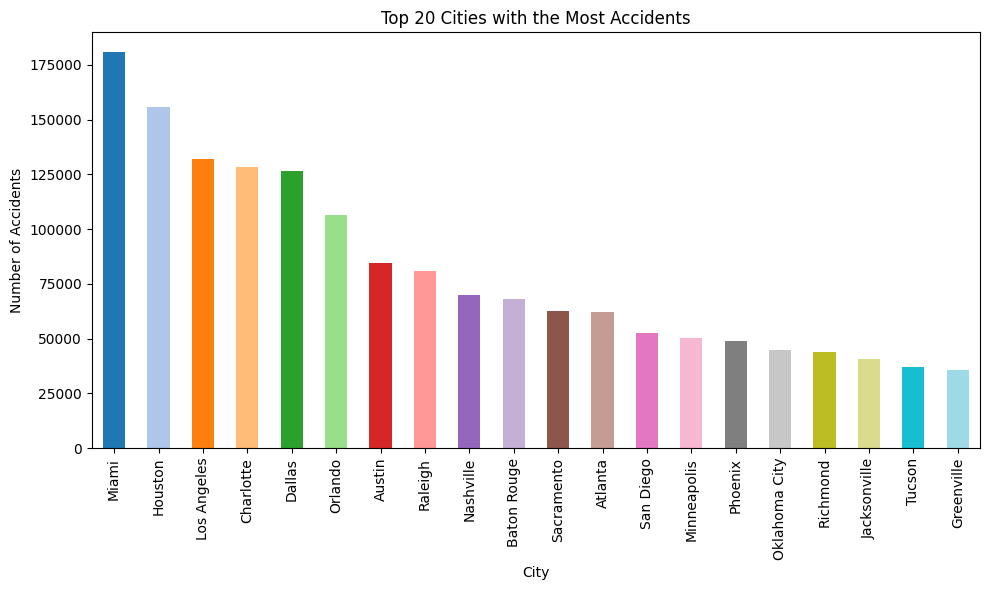

In [15]:
# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

In [16]:
# Get the top 20 Stateswith the most accidents
accidents_by_state = df['State'].value_counts()

top_20_states = accidents_by_state.head(20)
print("Top 20 States with the Most Accidents:")
print(top_20_states)

Top 20 States with the Most Accidents:
State
CA    1557457
FL     829647
TX     536438
SC     348587
NY     325866
NC     308891
PA     269485
VA     267992
MN     181436
OR     165075
IL     161714
TN     158464
MI     154743
AZ     153552
GA     151180
LA     141770
NJ     124290
OH     110296
MD     103328
WA      97311
Name: count, dtype: int64


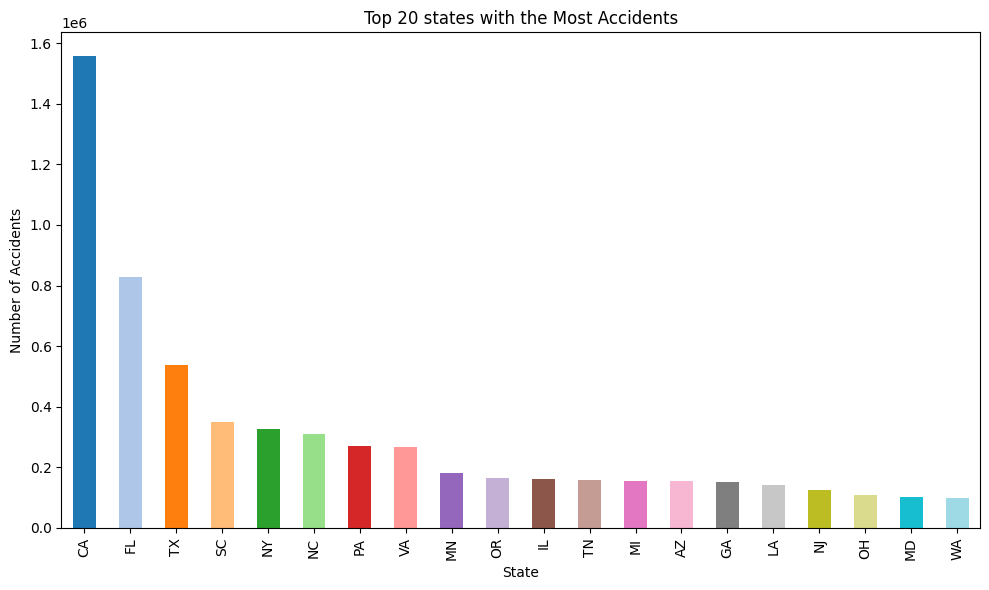

In [17]:
# Create the bar plot
plt.figure(figsize=(10, 6))
top_20_states.plot(kind='bar',color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 states with the Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

In [18]:
#Filtering the Accidents in California By City
accidents_california = df[df['State'] == 'CA']

#Filtering the top 5 cities in California with most Accidents
accidents_by_city_california = accidents_california['City'].value_counts().head(5)

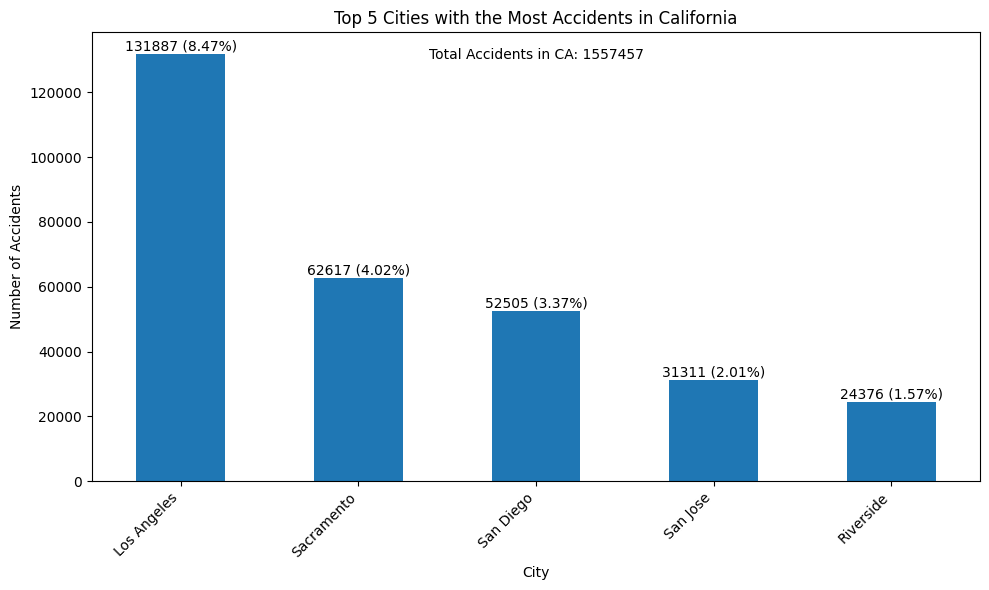

In [19]:
# Calculate the total percentage of accidents in California
total_accidents_california = len(accidents_california)
percentage_california = total_accidents_california / len(df) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_california.plot(kind='bar', color='#1F77B4')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in California')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_california):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_california * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in CA: {total_accidents_california}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

In [20]:
#Filtering the Accidents in Florida By City
accidents_florida = df[df['State'] == 'FL']

#Filtering the top 5 cities in California with most Accidents
accidents_by_city_florida = accidents_florida['City'].value_counts().head(5)

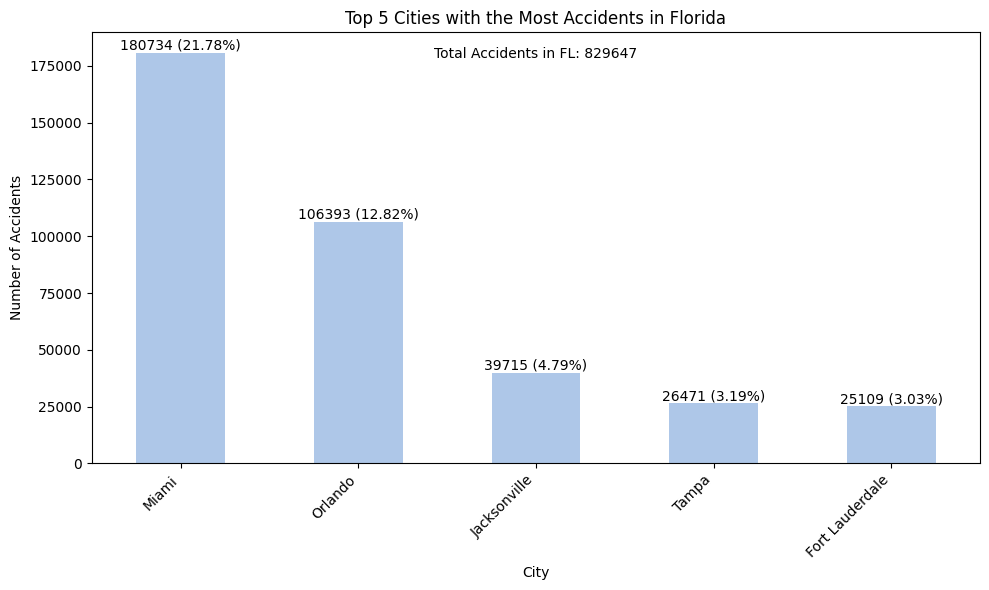

In [21]:
# Calculate the total percentage of accidents in florida
total_accidents_florida = len(accidents_florida)
percentage_florida = total_accidents_florida / len(df) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_florida.plot(kind='bar', color='#AEC7E8')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in Florida')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_florida):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_florida * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in FL: {total_accidents_florida}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

In [22]:
#Filtering the Accidents in Texas By City
accidents_texas = df[df['State'] == 'TX']

#Filtering the top 5 cities in Texas with most Accidents
accidents_by_city_texas = accidents_texas['City'].value_counts().head(5)

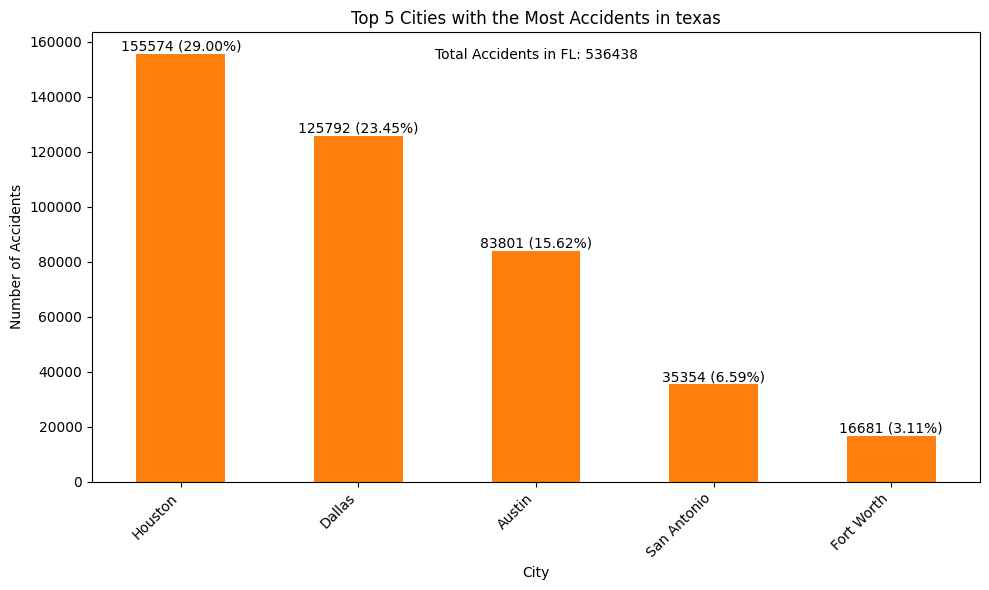

In [23]:
# Calculate the total percentage of accidents in texas
total_accidents_texas = len(accidents_texas)
percentage_texas= total_accidents_texas / len(df) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_texas.plot(kind='bar', color='#FF7F0E')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in texas')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_texas):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_texas * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in FL: {total_accidents_texas}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

### Analysis by weather 

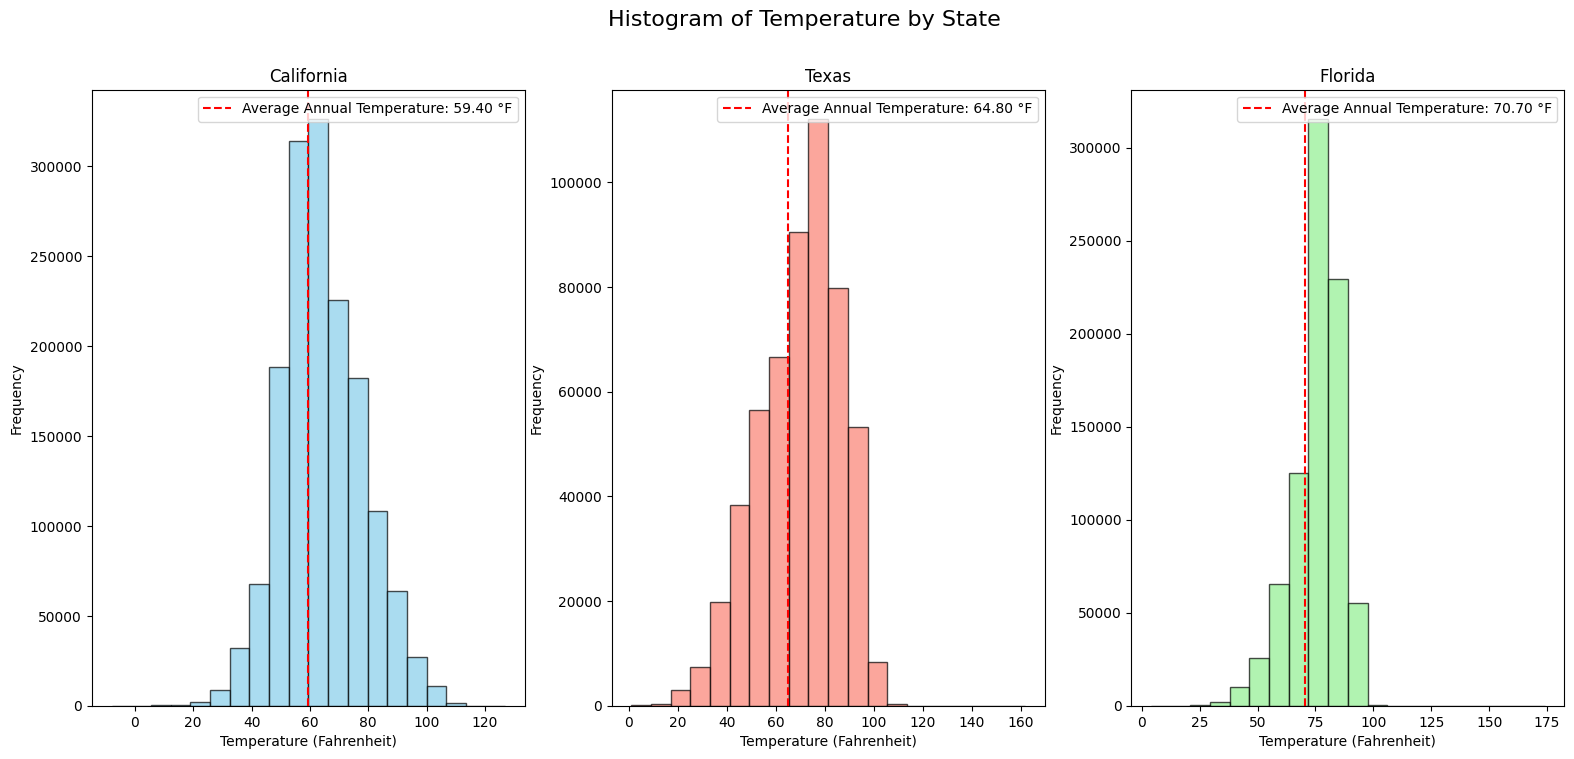

In [24]:
# Filter data for California, Texas, and Florida
california_data = df[df['State'] == 'CA']['Temperature(F)'].dropna()
texas_data = df[df['State'] == 'TX']['Temperature(F)'].dropna()
florida_data = df[df['State'] == 'FL']['Temperature(F)'].dropna()

# Calculate mean temperatures for each state
california_mean_temp = 59.4
texas_mean_temp = 64.8
florida_mean_temp = 70.7

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(19, 8))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {california_mean_temp:.2f} °F')
axes[0].set_title('California')
axes[0].set_xlabel('Temperature (Fahrenheit)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {texas_mean_temp:.2f} °F')
axes[1].set_title('Texas')
axes[1].set_xlabel('Temperature (Fahrenheit)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {florida_mean_temp:.2f} °F')
axes[2].set_title('Florida')
axes[2].set_xlabel('Temperature (Fahrenheit)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Temperature by State', fontsize=16)

plt.show()


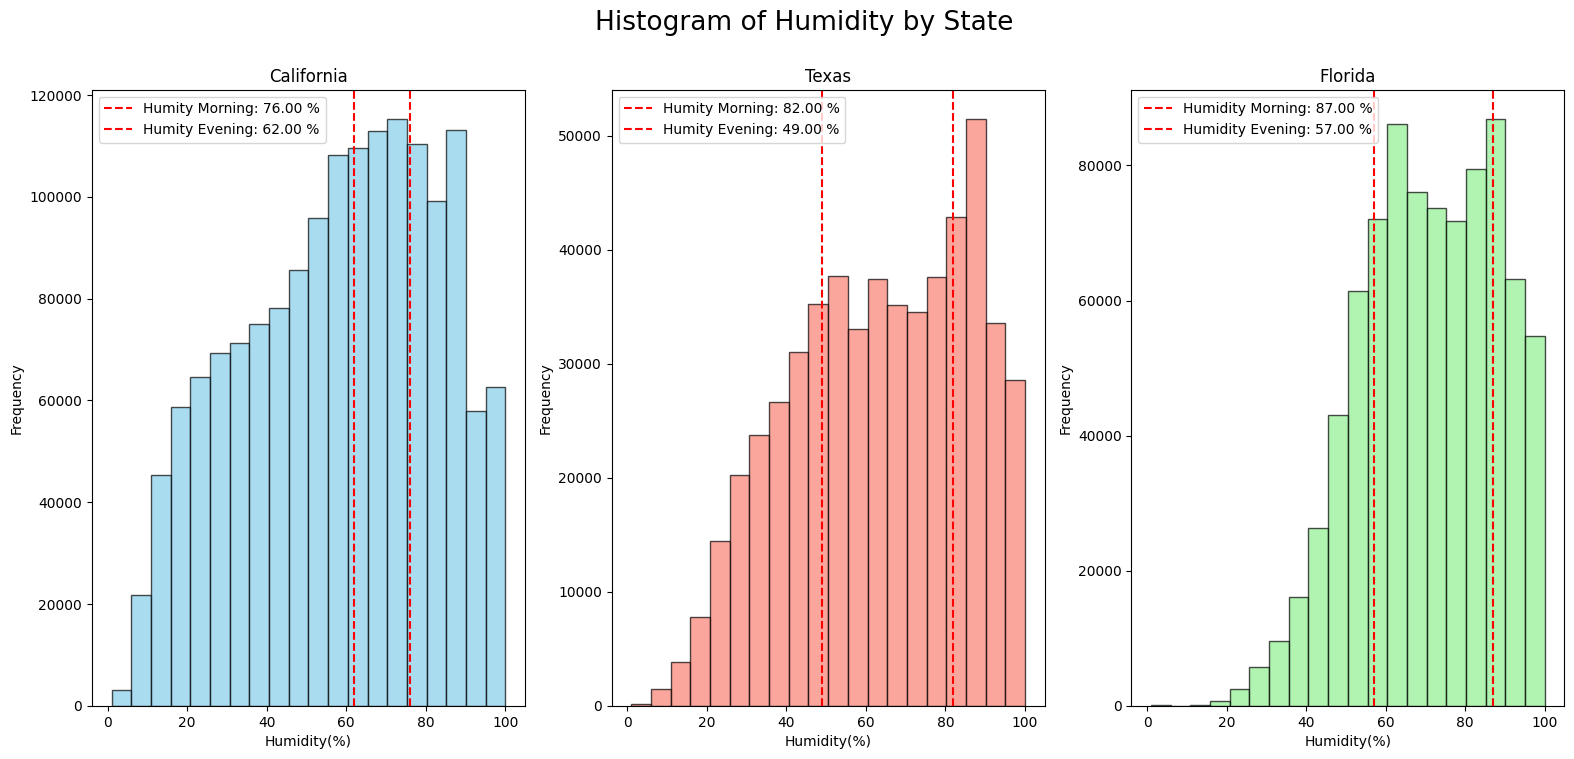

In [25]:
# Filter data for California, Texas, and Florida
california_data = df[df['State'] == 'CA']['Humidity(%)'].dropna()
texas_data = df[df['State'] == 'TX']['Humidity(%)'].dropna()
florida_data = df[df['State'] == 'FL']['Humidity(%)'].dropna()

# Calculate mean temperatures for each state
california_mean_humity_morning = 76
california_mean_humity_night = 62
texas_mean_humity_morning = 82
texas_mean_humity_night = 49
florida_mean_humity_morning = 87
florida_mean_humity_night = 57

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(19, 8))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humity Morning: {california_mean_humity_morning:.2f} %')
axes[0].axvline(california_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humity Evening: {california_mean_humity_night:.2f} %')
axes[0].set_title('California')
axes[0].set_xlabel('Humidity(%)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humity Morning: {texas_mean_humity_morning:.2f} %')
axes[1].axvline(texas_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humity Evening: {texas_mean_humity_night:.2f} %')
axes[1].set_title('Texas')
axes[1].set_xlabel('Humidity(%)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humidity Morning: {florida_mean_humity_morning:.2f} %')
axes[2].axvline(florida_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humidity Evening: {florida_mean_humity_night:.2f} %')
axes[2].set_title('Florida')
axes[2].set_xlabel('Humidity(%)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Humidity by State', fontsize=19)

plt.show()

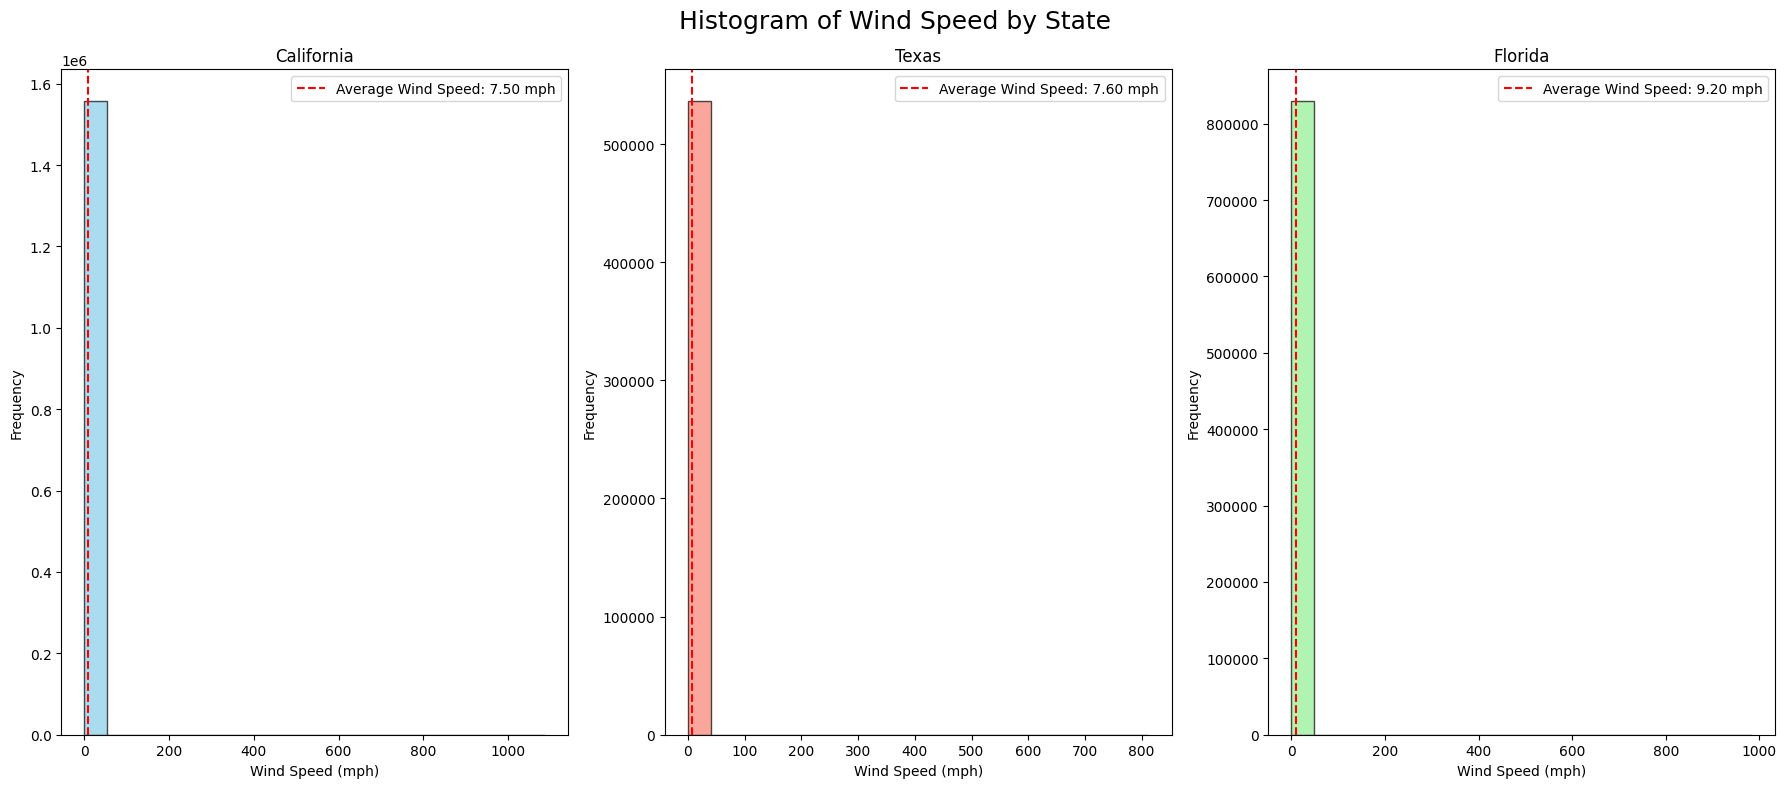

In [26]:
# Filter data for California, Texas, and Florida
california_data = df[df['State'] == 'CA']['Wind_Speed(mph)'].dropna()
texas_data = df[df['State'] == 'TX']['Wind_Speed(mph)'].dropna()
florida_data = df[df['State'] == 'FL']['Wind_Speed(mph)'].dropna()

# Calculate mean temperatures for each state
california_mean_wind = 7.5
texas_mean_wind = 7.6
florida_mean_wind = 9.2

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_wind, color='red', linestyle='--', linewidth=1.5, label=f'Average Wind Speed: {california_mean_wind:.2f} mph')
axes[0].set_title('California')
axes[0].set_xlabel('Wind Speed (mph)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_wind, color='red', linestyle='--', linewidth=1.5, label=f'Average Wind Speed: {texas_mean_wind:.2f} mph')
axes[1].set_title('Texas')
axes[1].set_xlabel('Wind Speed (mph)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_wind, color='red', linestyle='--', linewidth=1.5, label=f'Average Wind Speed: {florida_mean_wind:.2f} mph')
axes[2].set_title('Florida')
axes[2].set_xlabel('Wind Speed (mph)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Wind Speed by State', fontsize=18)
plt.tight_layout()
plt.show()

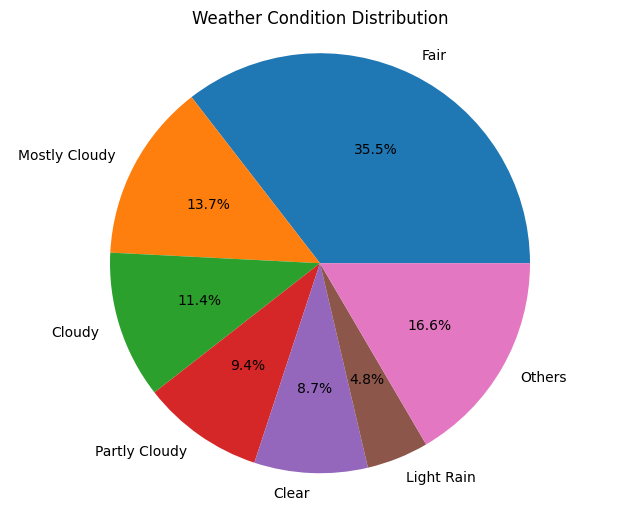

In [27]:
# Graph the Weather conditions in a Pie Chart
weather_counts = df['Weather_Condition'].value_counts()

# Group the main categories of weather conditions
top_conditions = weather_counts.head(6)
other_conditions_count = weather_counts.iloc[6:].sum()

# Create a new DataFrame with the summarized weather conditions
summary_weather_counts = pd.DataFrame(top_conditions).reset_index()
summary_weather_counts.columns = ['Weather_Condition', 'Count']

others_row = pd.DataFrame({'Weather_Condition': ['Others'], 'Count': [other_conditions_count]})
summary_weather_counts = pd.concat([summary_weather_counts, others_row], ignore_index=True)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(summary_weather_counts['Count'], labels=summary_weather_counts['Weather_Condition'], autopct='%1.1f%%')
plt.title('Weather Condition Distribution')
plt.axis('equal')
plt.show()
